## Run stats on results from lcrPicker

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats

from IPython.display import display

In [2]:
# load main lcr picker db, this is created in lcrPicker.py mergeDatabase()
# remember, mergeDatabase() is removing lcr occuring right before the spike (~ 150 ms)
path = '/Users/cudmore/Sites/SanPy/examples/dual-analysis/lcrPicker-db.csv'
df = pd.read_csv(path, header=0)

print('num lcr:', len(df))
display(df.head())

print(df.columns)

num lcr: 771


,Unnamed: 0,Unnamed: 0.1,idx,spikeNum,spikeSec,lcrSec,lcrSum,lcrNum,lcrVm,preVmSec,...,lcrPreDepol,lcrPostDepol,region,cell number,trial,tifBins_ms,vmBinSeconds,tifFile,tifPath,lcrPreSpikeSec
0,0,0,0,1.0,2.6027,0.9158,0.920,NaN,-54.58,0.8364,...,0.07,0.08,inferior,16,16a,50,0.01,20210218_.tif,dual-data/20210218/20210218_.tif,1.6869
1,1,1,1,1.0,2.6027,1.1158,1.821,NaN,-52.70,0.9809,...,0.99,0.14,inferior,16,16a,50,0.01,20210218_.tif,dual-data/20210218/20210218_.tif,1.4869
2,2,2,2,1.0,2.6027,1.3658,6.936,NaN,-52.04,1.2736,...,1.81,-0.11,inferior,16,16a,50,0.01,20210218_.tif,dual-data/20210218/20210218_.tif,1.2369
3,3,3,3,1.0,2.6027,1.8158,1.655,NaN,-54.34,1.7242,...,-0.80,0.28,inferior,16,16a,50,0.01,20210218_.tif,dual-data/20210218/20210218_.tif,0.7869
4,4,4,4,1.0,2.6027,2.0158,1.069,NaN,-53.14,1.9238,...,0.94,-0.42,inferior,16,16a,50,0.01,20210218_.tif,dual-data/20210218/20210218_.tif,0.5869


Index(['Unnamed: 0', 'Unnamed: 0.1', 'idx', 'spikeNum', 'spikeSec', 'lcrSec',
       'lcrSum', 'lcrNum', 'lcrVm', 'preVmSec', 'preVmInt', 'preVmMean',
       'postVmSec', 'postVmInt', 'postVmMean', 'lcrPreDepol', 'lcrPostDepol',
       'region', 'cell number', 'trial', 'tifBins_ms', 'vmBinSeconds',
       'tifFile', 'tifPath', 'lcrPreSpikeSec'],
      dtype='object')


In [3]:
# reject cell number 11 (superior), it only has 6 lcr
#df = df.query('line_race != 0')

badCellNumber = 11

print('before dropping badCellNumber:', badCellNumber, 'num lcr:', len(df))

# Get names of indexes for which column Age has value 30
indexNames = df[ df['cell number'] == badCellNumber ].index
# Delete these row indexes from dataFrame
df = df.drop(indexNames)
# reset the row index(s)
df = df.reset_index(drop=True)

print('after dropping badCellNumber:', badCellNumber, 'num lcr:', len(df))


before dropping badCellNumber: 11 num lcr: 771
after dropping badCellNumber: 11 num lcr: 765


## Naive approach is to ignore (trials, cells) and just analyze all LCRs effect on Vm

Text(15.139140624999996, 0.5, 'LCR Depolarization (mV)')

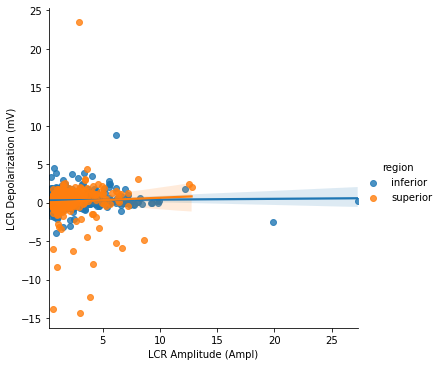

In [4]:
# plot and stat test (lcrSum, lcrPreDepol) for linear corelation

# remove lcrSum > 15
#df = df[ df['lcrSum'] < 15 ]


# compare the strength of an lcr with the resultant membrane depolarization
xStat = 'lcrSum'
yStat = 'lcrPreDepol'
#yStat = 'lcrPostDepol'

hue = 'region'
g = sns.lmplot(x=xStat, y=yStat, hue=hue, data=df); # figure level plot, does not return axs
axes = g.fig.axes
#axes.spines['right'].set_visible(False)
#axes.spines['top'].set_visible(False)

axes[0].set_xlabel('LCR Amplitude (Ampl)')
axes[0].set_ylabel('LCR Depolarization (mV)')

# based on particular values
#axes.set_ylim(-2, 3)
#axes.set_xlim(0, 5.5)

lcrSum


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
inferior,439.0,2.431043,2.575614,0.373,0.836,1.394,3.42900,27.265
superior,326.0,2.041291,1.760065,0.357,0.859,1.412,2.64425,12.772


lcrPreDepol


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
inferior,439.0,0.325330,1.047062,-3.97,-0.15,0.17,0.68,8.83
superior,325.0,0.150246,2.326756,-14.37,-0.23,0.26,0.97,23.48


lcrPreDepol superior t: 1.164 p: 0.245
lcrPreDepol inferior t: 6.51 p: 0.0
lcrPostDepol superior t: 2.161 p: 0.031
lcrPostDepol inferior t: -0.328 p: 0.743


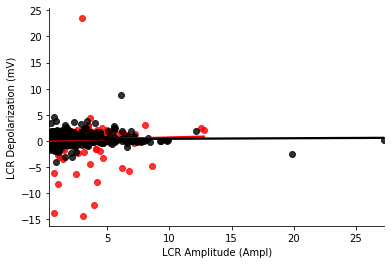

In [5]:
regionList = ['superior', 'inferior']
colorDict = {'superior':'r', 'inferior':'k'}
xStat = 'lcrSum'
yStat = 'lcrPreDepol'
for region in regionList:
    dfRegion = df[ df['region']==region ]
    #print(region, 'n=', len(dfRegion))
    color = colorDict[region]
    axGlobal = sns.regplot(x=xStat, y=yStat, data=dfRegion,
            ci=None, # turn off cconfidence intervals
            ax=None,
            color=color,
            label=region);

axGlobal.set_xlabel('LCR Amplitude (Ampl)')
axGlobal.set_ylabel('LCR Depolarization (mV)')

axGlobal.spines['right'].set_visible(False)
axGlobal.spines['top'].set_visible(False)

# based on particular values
#axGlobal.set_xlim(0, 15)
#axGlobal.set_ylim(-16, 16)

print(xStat)
xtt = df.groupby('region')[xStat].describe()
display(xtt)
print(yStat)
ytt = df.groupby('region')[yStat].describe()
display(ytt)

# one sample t-test to ask "is LCR Depolarization > 0"
popmean = 0 # Expected value in null hypothesis
for region in regionList:
    dfRegion = df[ df['region']==region ]
    oneStat = dfRegion['lcrPreDepol'].tolist()
    # remove nan
    #oneStat = [x for x in oneStat if x!=np.nan]
    statistic, pValue = scipy.stats.ttest_1samp(oneStat, popmean, nan_policy='omit')
    print('lcrPreDepol', region, 't:', round(statistic,3), 'p:', round(pValue,3))
    
popmean = 0 # Expected value in null hypothesis
for region in regionList:
    dfRegion = df[ df['region']==region ]
    oneStat = dfRegion['lcrPostDepol'].tolist()
    # remove nan
    #oneStat = [x for x in oneStat if x!=np.nan]
    statistic, pValue = scipy.stats.ttest_1samp(oneStat, popmean, nan_policy='omit')
    print('lcrPostDepol', region, 't:', round(statistic,3), 'p:', round(pValue,3))
    
    #display(dfRegion[yStat].describe())

In [6]:
# split into (superior, inferior)
# this is using all raw lcr. Recordings with lots (n=50) will be
# artificially weighted versus recordings with few (n=10).
# test if there is a significant correlation between (lcrSum, lcrPreDepol)

regions = ['superior', 'inferior']
for region in regions:
    print(region)
    
    dfRegion = df[ df['region'] == region]

    x_values = dfRegion[xStat]
    y_values = dfRegion[yStat]

    # strip nan, we are comparing a scatter plot, every x needs a y
    notNanIdx = ~np.isnan(x_values) & ~np.isnan(y_values) # strip nan

    n = np.sum(notNanIdx)
    
    resultObj = scipy.stats.linregress(x_values[notNanIdx], y_values[notNanIdx])
    print('  n:', n, 'slope:', round(resultObj.slope,3), 'p:', round(resultObj.pvalue,3))

    rTmp, pTmp = scipy.stats.pearsonr(x_values[notNanIdx], y_values[notNanIdx])
    print('  n:', n, 'pearsonsr r:', round(rTmp,3), 'p:', round(pTmp,3))


superior
  n: 325 slope: 0.063 p: 0.395
  n: 325 pearsonsr r: 0.047 p: 0.395
inferior
  n: 439 slope: 0.01 p: 0.598
  n: 439 pearsonsr r: 0.025 p: 0.598


## More robust method is to gather the mean for each 'cell number' and make the same comparison

This is a list of the mean within each "cell number", it is the mean across "trial"


,cell number,count,mean,std,min,25%,50%,75%,max,sem,region,stat
0,2,162.0,2.075722,1.975354,0.578,0.83025,1.2275,2.44125,12.772,0.155198,superior,lcrSum
1,4,71.0,1.023803,0.565729,0.357,0.64900,0.8580,1.12450,2.938,0.067140,superior,lcrSum
2,6,44.0,2.888886,1.699938,0.967,1.38750,2.4720,4.15425,6.620,0.256275,superior,lcrSum
3,9,49.0,2.640673,1.506876,1.002,1.54500,2.1740,3.60500,8.084,0.215268,superior,lcrSum


,cell number,count,mean,std,min,25%,50%,75%,max,sem,region,stat
0,2,161.0,-0.088137,2.879640,-13.81,-0.5000,0.160,0.850,23.48,0.226947,superior,lcrPreDepol
1,4,71.0,0.108169,0.491927,-1.49,-0.1150,0.120,0.350,1.99,0.058381,superior,lcrPreDepol
2,6,44.0,-0.171136,2.560845,-14.37,-0.2125,0.225,0.785,3.12,0.386062,superior,lcrPreDepol
3,9,49.0,1.283061,1.037493,-3.18,0.7900,1.290,1.790,4.42,0.148213,superior,lcrPreDepol


  region:	superior	slope:	-0.092	p:	0.932
  region:	superior	pearsonsr r:	-0.068	p:	0.932


,cell number,count,mean,std,min,25%,50%,75%,max,sem,region,stat
0,3,123.0,4.080447,2.445364,0.623,1.75200,4.2640,5.67150,9.896,0.220491,inferior,lcrSum
1,5,66.0,2.110000,1.786850,0.838,1.10450,1.5060,2.32750,12.169,0.219946,inferior,lcrSum
2,7,12.0,3.123083,1.248773,1.612,2.15250,2.9160,3.91925,5.224,0.360490,inferior,lcrSum
3,14,79.0,1.810747,1.219920,0.605,0.85450,1.4150,2.36550,5.650,0.137252,inferior,lcrSum
4,15,18.0,0.904167,0.264911,0.583,0.73625,0.8020,0.98350,1.581,0.062440,inferior,lcrSum
5,16,32.0,4.223281,5.609598,0.752,1.44625,1.8705,4.70850,27.265,0.991646,inferior,lcrSum
6,19,109.0,0.863550,0.796201,0.373,0.47500,0.5920,0.99900,6.848,0.076262,inferior,lcrSum


,cell number,count,mean,std,min,25%,50%,75%,max,sem,region,stat
0,3,123.0,0.015935,0.311955,-0.91,-0.115,0.030,0.1700,0.95,0.028128,inferior,lcrPreDepol
1,5,66.0,0.750606,1.593775,-3.14,-0.025,0.555,1.5050,8.83,0.196180,inferior,lcrPreDepol
2,7,12.0,1.024167,0.944895,-0.88,0.385,1.170,1.7625,2.43,0.272768,inferior,lcrPreDepol
3,14,79.0,0.264051,0.897604,-2.29,-0.165,0.290,0.6150,2.48,0.100988,inferior,lcrPreDepol
4,15,18.0,0.405556,0.422892,-0.24,0.190,0.290,0.6150,1.52,0.099677,inferior,lcrPreDepol
5,16,32.0,0.682813,1.545203,-3.97,0.130,0.750,1.4575,4.49,0.273156,inferior,lcrPreDepol
6,19,109.0,0.266239,1.049864,-2.18,-0.280,0.200,0.8200,3.83,0.100559,inferior,lcrPreDepol


  region:	inferior	slope:	0.146	p:	0.633
  region:	inferior	pearsonsr r:	0.222	p:	0.633


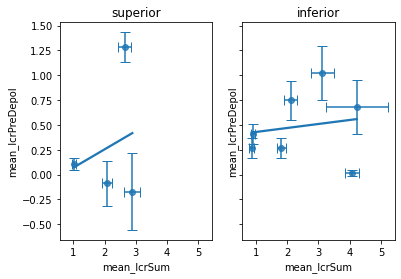

In [7]:
print('This is a list of the mean within each "cell number", it is the mean across "trial"')

# to do stats between regions (after loop)
compareRegions = {}
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

dfMeanFinal = None

regions = ['superior', 'inferior']
for idx, region in enumerate(regions):
    
    dfRegion = df[ df['region'] == region]

    analysisName = 'cell number' # we have a number of 'trial' per cell number
    groupList = ['lcrSum', 'lcrPreDepol'] # a list of stats/columns to group
    
    #meanDf0 = dfRegion.groupby(analysisName).describe().unstack(1)
    #meanDf0 = dfRegion.groupby(analysisName).describe().reset_index().pivot(index=analysisName, values='lcrSum', columns='level_1')
    #display(meanDf0)
    
    #meanDf = dfRegion.groupby(analysisName, as_index=False)[groupList].mean()
    meanDf = dfRegion.groupby(analysisName, as_index=False)[groupList].agg(
                            min_lcrSum=('lcrSum', min),
                            max_lcrSum=('lcrSum', max),
                            median_lcrSum=('lcrSum', np.median),
                            mean_lcrSum=('lcrSum', np.mean),
                            sem_lcrSum=('lcrSum', scipy.stats.sem),
                            n_lcrSum=('lcrSum', 'count'),
                            #
                            min_lcrPreDepol=('lcrPreDepol', min),
                            max_lcrPreDepol=('lcrPreDepol', max),
                            median_lcrPreDepol=('lcrPreDepol', np.median),
                            mean_lcrPreDepol=('lcrPreDepol', np.mean),
                            sem_lcrPreDepol=('lcrPreDepol', scipy.stats.sem),
                            n_lcrPreDepol=('lcrPreDepol', 'count'),
        
                          )
        
    meanDf = meanDf.reset_index()
    meanDf['region'] = region
    #display(meanDf)

    #simplified version of above, one table per (region x xStat x yStat)
    #print(region, 'lcrSum')
    meanDf2 = dfRegion.groupby(analysisName)['lcrSum'].describe()
    meanDf2 = meanDf2.reset_index()
    # add sem column
    dfSem = dfRegion.groupby(analysisName)['lcrSum'].sem()
    dfSem = dfSem.reset_index()
    meanDf2['sem'] = dfSem['lcrSum']
    meanDf2['region'] = region
    meanDf2['stat'] = 'lcrSum'
    display(meanDf2)

    #print(region, 'lcrPreDepol')
    meanDf2 = dfRegion.groupby(analysisName)['lcrPreDepol'].describe()
    meanDf2 = meanDf2.reset_index()
    # add sem column
    dfSem = dfRegion.groupby(analysisName)['lcrPreDepol'].sem()
    dfSem = dfSem.reset_index()
    meanDf2['sem'] = dfSem['lcrPreDepol']
    meanDf2['region'] = region
    meanDf2['stat'] = 'lcrPreDepol'
    display(meanDf2)

    # merge int xxx to use seaborn hue='region'
    if dfMeanFinal is None:
        dfMeanFinal = meanDf
    else:
        dfMeanFinal = dfMeanFinal.append(meanDf)
        dfMeanFinal = dfMeanFinal.reset_index(drop=True)

    compareRegions[region] = {}
    compareRegions[region]['lcrSum'] = meanDf['mean_lcrSum']
    compareRegions[region]['lcrPreDepol'] = meanDf['mean_lcrPreDepol']

    #
    # now compare and run stats on mean within each cell
    x_values = meanDf['mean_lcrSum']
    y_value = meanDf['mean_lcrPreDepol']

    # strip nan, we are comparing a scatter plot, every x needs a y
    # we generally do not get nan values here
    notNanIdx = ~np.isnan(x_values) & ~np.isnan(y_values) # strip nan

    n = np.sum(notNanIdx)

    resultObj = scipy.stats.linregress(x_values[notNanIdx], y_values[notNanIdx])
    print('  region:', region, 'slope:', round(resultObj.slope,3), 'p:', round(resultObj.pvalue,3), sep='\t')

    rTmp, pTmp = scipy.stats.pearsonr(x_values[notNanIdx], y_values[notNanIdx])
    print('  region:', region, 'pearsonsr r:', round(rTmp,3), 'p:', round(pTmp,3), sep='\t')

    # plot it
    if 1:
        lmAx = sns.regplot(x='mean_lcrSum', y='mean_lcrPreDepol', 
                               data=meanDf, 
                               ci=None, ax=axs[idx])
        lmAx.set_title(region)
        #
        # add error bars with matplotlib (dfRegion is for current region)
        xd = dfRegion.groupby(['cell number']).mean().lcrSum
        yd = dfRegion.groupby(['cell number']).mean().lcrPreDepol
        xerrd = dfRegion.groupby(['cell number']).sem().lcrSum
        yerrd = dfRegion.groupby(['cell number']).sem().lcrPreDepol
        lmAx.errorbar(xd, yd, xerr=xerrd, yerr=yerrd, fmt='none', capsize=5, zorder=1, color='C0')

    # or this (directly from original df !!!)
    if 0:
        x = df.groupby(['cell number']).median().lcrSum
        y = df.groupby(['cell number']).median().lcrPreDepol
        sns.regplot(x=x, y=y)
    
plt.show()

#
if 0:
    print('compare between regions')
    print(compareRegions['superior'])
    print(compareRegions['inferior'])


## And then plot this mean for each cell accross trials (todo: check this)

saveFile: /Users/cudmore/Sites/SanPy/examples/dual-analysis/fig9/fig9-panels/lcrDepol-vs-lcrAmp-no-errors-may20.pdf


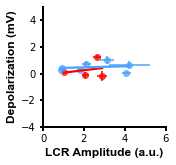

In [13]:
#hue = 'region'
#sns.lmplot(x=xStat, y=yStat, hue=hue, data=df)

# regplot does not have hue !!!
#lmAx2 = sns.regplot(x='mean_lcrSum', y='mean_lcrPreDepol', hue='region', data=dfMeanFinal, ci=None, ax=None)

hue = 'region'
xStat = 'mean_lcrSum'
yStat = 'mean_lcrPreDepol'

#colorList = ['k', 'r']
colorDict = {'superior':'#FF0000', 'inferior':'#4AA3FF00'}

doError = True

figsize = (2.2, 2.2)
fig, ax = plt.subplots(figsize=figsize)

hueList = dfMeanFinal[hue].unique()
for idx, oneHue in enumerate(hueList):
    #color = colorList[idx]
    color = colorDict[oneHue]
    
    dfHue = dfMeanFinal [ dfMeanFinal[hue]==oneHue ]
    #print('regplot oneHue:', oneHue, 'len(tmpDf)', len(tmpDf))
    axHue = sns.regplot(x=xStat, y=yStat, data=dfHue,
            ci=None, # turn off cconfidence intervals
            ax=ax,
            color=color,
            #palette=colorDict,
            scatter_kws={'alpha':0.7},
            label=oneHue);
    #
    # add error bars with matplotlib (dfRegion is for current region, ALL ORIGINAL DATA)
    if doError:
        dfRegion = df[ df['region'] == oneHue]
        xd = dfRegion.groupby(['cell number']).mean().lcrSum
        yd = dfRegion.groupby(['cell number']).mean().lcrPreDepol
        xerrd = dfRegion.groupby(['cell number']).sem().lcrSum
        yerrd = dfRegion.groupby(['cell number']).sem().lcrPreDepol
        axHue.errorbar(xd, yd, xerr=xerrd, yerr=yerrd, 
                       fmt='none', capsize=0, zorder=1, color=color, alpha=1);

#axHue.figure.set_size_inches(4, 4)

axHue.spines['right'].set_visible(False)
axHue.spines['top'].set_visible(False)

fontdict = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 12}
#plt.rc('font', **font)

axHue.set_xlabel('LCR Amplitude (a.u.)', fontdict=fontdict)
axHue.set_ylabel('Depolarization (mV)', fontdict=fontdict)
#axHue.set_ylabel('Depolarization (mV)', fontsize=12, fontweight='bold', fontname="Arial")

# based on particular values
axHue.set_ylim(-4, 5)
axHue.set_xlim(0, 6)

plt.setp(axHue.spines.values(), linewidth=2)
axHue.tick_params(width=2)


savePath = '/Users/cudmore/Sites/SanPy/examples/dual-analysis/fig9/fig9-panels'
saveFile = f'{savePath}/lcrDepol-vs-lcrAmp-no-errors-may20.pdf'
print('saveFile:', saveFile)
#axHue.figure.set_size_inches(2.2, 2.2)
plt.savefig(saveFile, dpi=600)